<a href="https://colab.research.google.com/github/inocentejr/CODE7_IFSP_SLT/blob/main/Hello_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello Python!

Usando o Python para o Controle

## Parte 1: Importando alguns módulos

Importaremos alguns módulos necessários:

- control (controle)
- plotly (gráficos)
- numpy (numéricos)

Como o módulo control não é ativo do colab, ele deverá ser instalado na execução do código. Se estiver rodando localmente, com o módulo instalado, não precisa executar a célula abaixo.



In [3]:
pip install control

     |████████████████████████████████| 357 kB 6.9 MB/s 
  Created wheel for control: filename=control-0.9.1-py2.py3-none-any.whl size=364703 sha256=bbe9ab012e530a92c8bf25b74a161f132738ac994ce8edb317762e9be0e63014
  Stored in directory: /root/.cache/pip/wheels/b1/50/22/8005107713828997d1af664fbd629c7f935a1b87fc2f4ba6c1
Successfully built control


In [1]:
import control
import plotly
import numpy as np

## Modelando e simulando um sistema de 1ª Ordem

Utilizaremos o módulo control para a simulação de um sistema dinâmico, da mesma maneira que fazemos com o Matlab ou Octave.

A Função Transferência de um Sistema de 1a Ordem é dada por:

$F(s)=\frac{K \cdot e^{-\theta \cdot s}}{\tau \cdot s+1}$

Lembrando:
- $K$: Ganho Estático do Processo
- $\tau$: Constante de Tempo do Processo
- $\theta$: Tempo Morto do Processo

## Função de Transferência sem o tempo morto

A sintaxe aqui é bastante parecida com a do Matlab. Podemos criar uma Função de Transferência utilizando o comando control.tf() (a única diferença aqui é que deve ser acrescentado o control. para indicar que estamos chamando uma função do módulo control)

In [10]:
K = 1
tau = 10
theta = 1

Nf = [K]
Df = [tau,1]

F = control.tf(Nf,Df)
F


    1
--------
10 s + 1

## Incorporando o Tempo Morto

Para incorporar o tempo morto na simulação, é necessária a aproximação de Pade

In [11]:
nd,dd = control.delay.pade(theta,4)

Fd = control.tf(nd,dd)

F = F*Fd
F


           s^4 - 20 s^3 + 180 s^2 - 840 s + 1680
-----------------------------------------------------------
10 s^5 + 201 s^4 + 1820 s^3 + 8580 s^2 + 1.764e+04 s + 1680

## Simulação do sistema

Faremos a simulação da resposta ao degrau do sistema.

In [18]:
t = np.arange(0,50,0.1)

_,y=control.step_response(F,t)

In [19]:
import plotly.express as px

In [20]:
fig = px.line(x=t,y=y)
fig.show()

In [21]:
import matplotlib.pyplot as plt

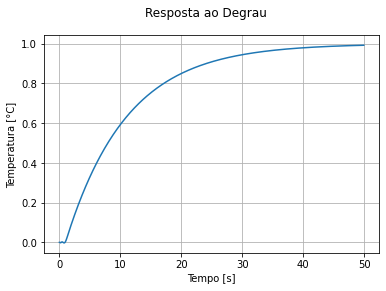

In [28]:
fig,ax = plt.subplots()
ax.plot(t,y)
fig.suptitle('Resposta ao Degrau')
ax.set_xlabel('Tempo [s]')
ax.set_ylabel('Temperatura [°C]')
ax.grid()